## Read wav files of Cetacean songs 
### plot spectrographs and waveforms


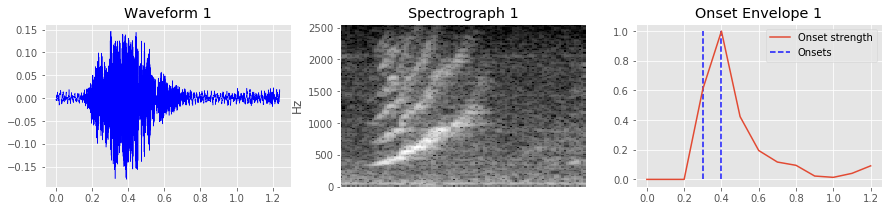

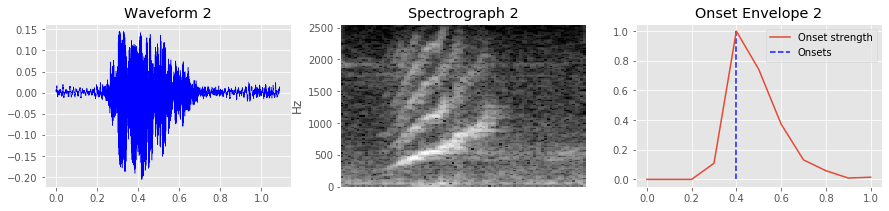

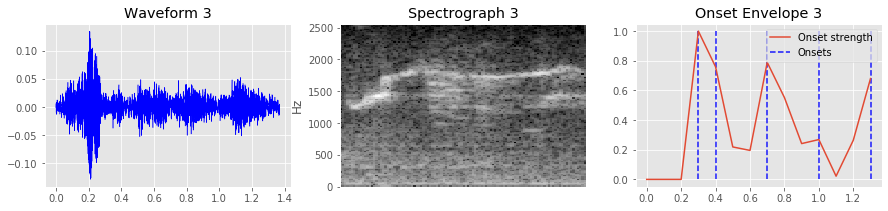

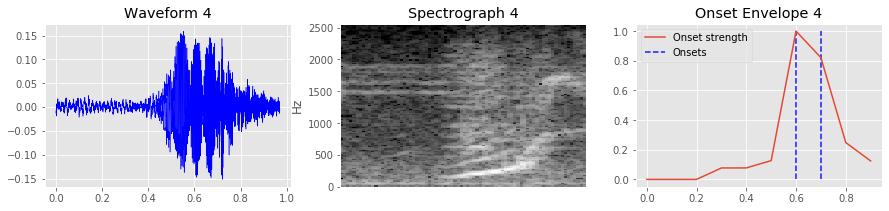

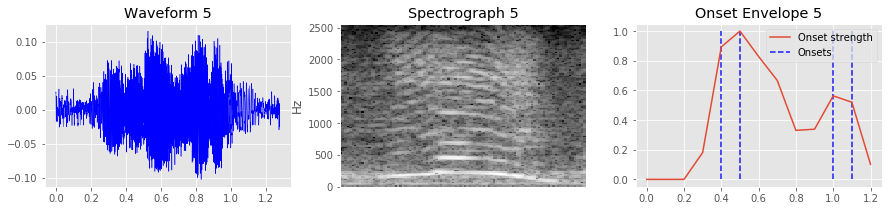

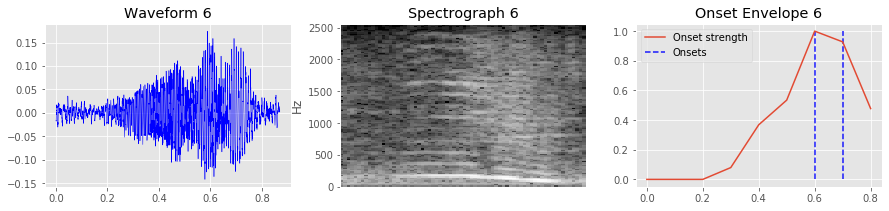

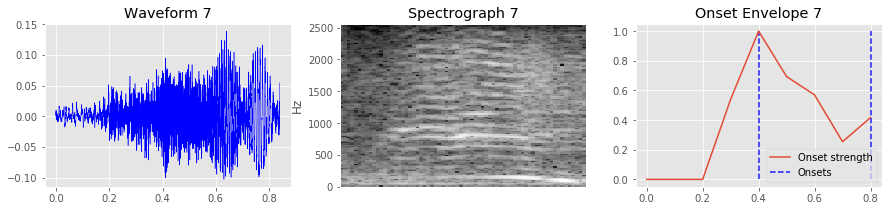

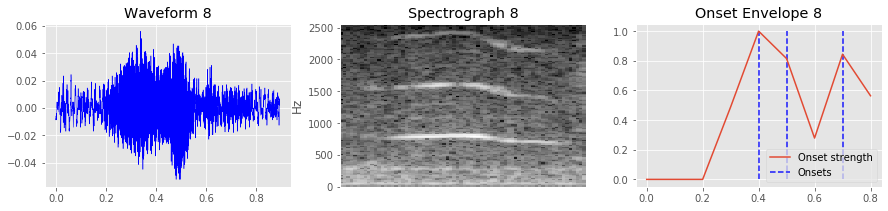

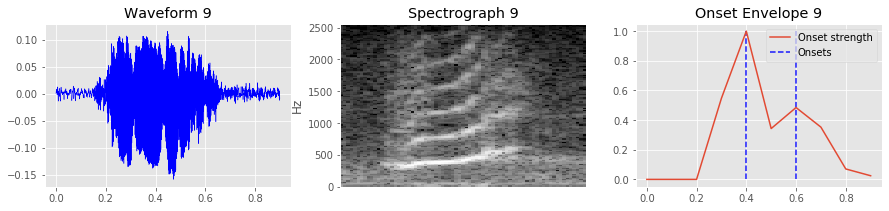

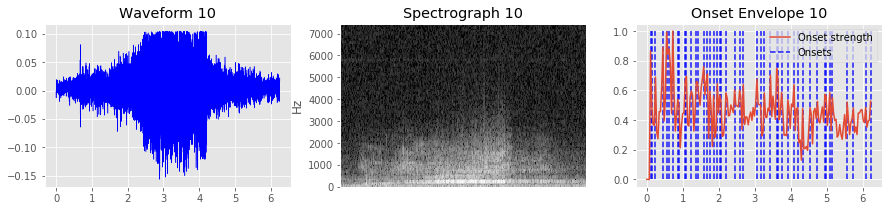

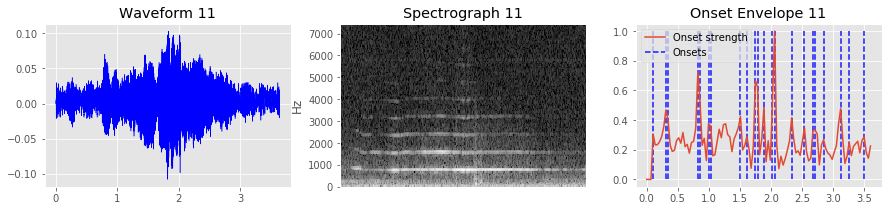

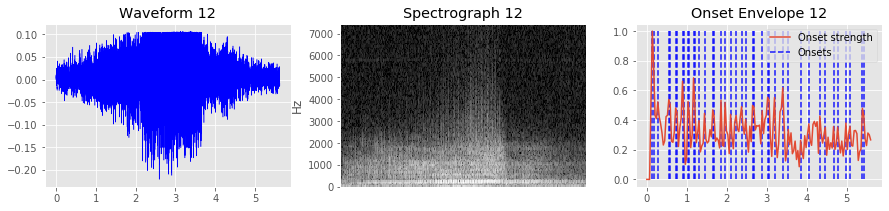

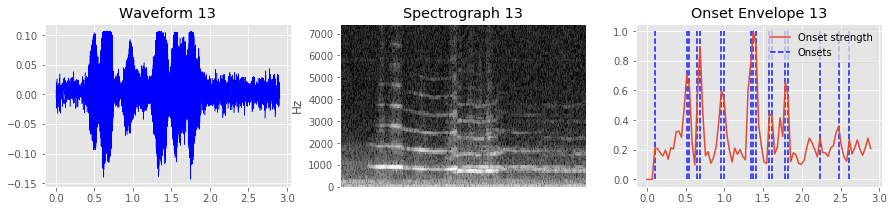

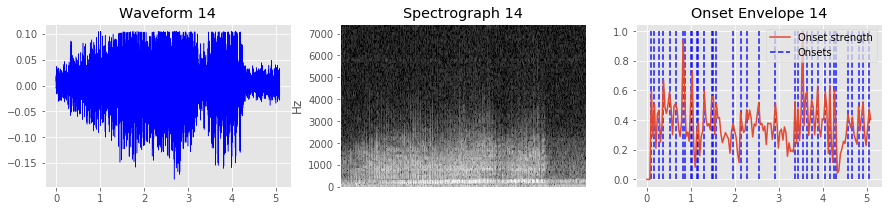

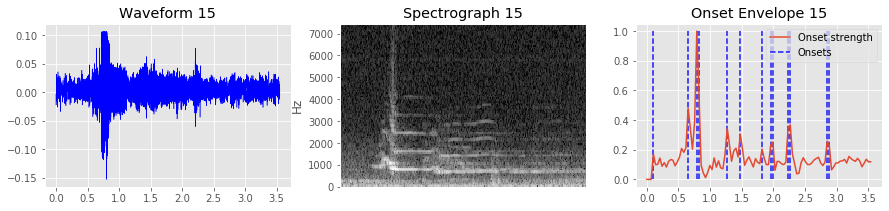

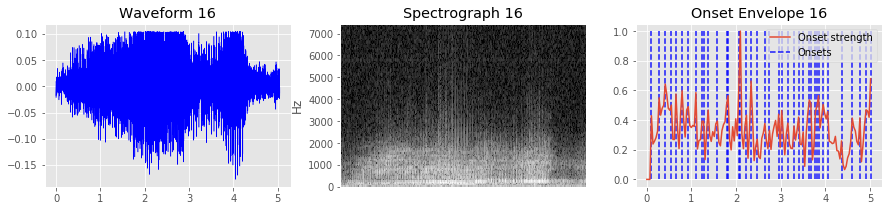

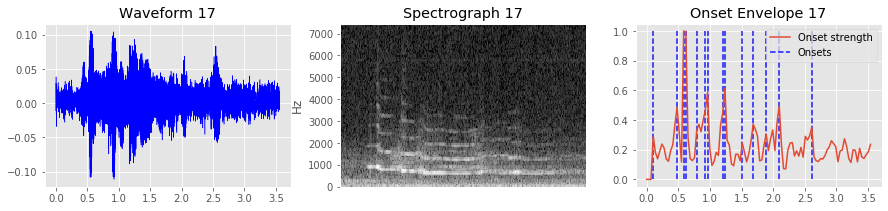

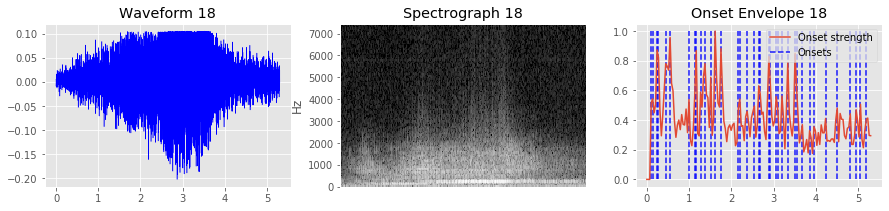

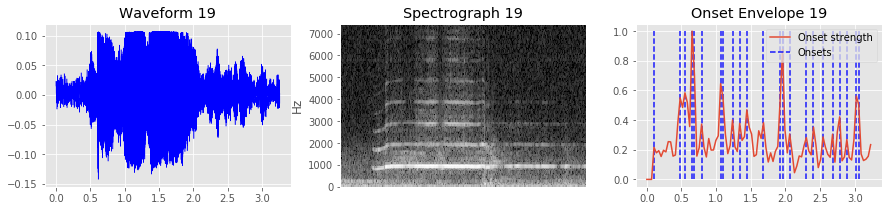

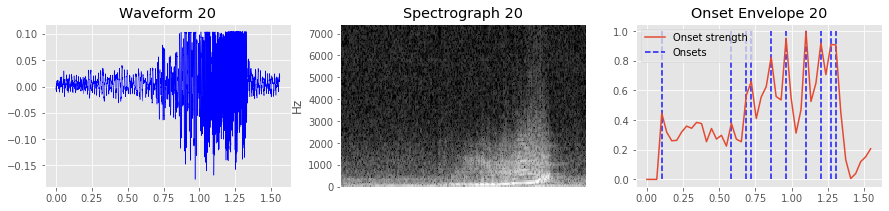

In [73]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

# import lots of the tools I'll need, some not needed yet
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
pd.options.display.max_columns = 10
import numpy as np
import librosa
import librosa.display
import os
import fnmatch
import IPython.display as ipd

# dir containing sound files (these are not all Orcas mut I mislabled the folder)
srcdir = './orca_songs'

numsongs=20
hoplength=None
fftsize=256
numsamps=100000

for i in range(1,numsongs+1):
    
    # read and plot vocalization 1
    whalesong = srcdir+'/orca'+str(i)+'.wav'
    y, sr = librosa.load(whalesong, sr=None)

    # time of each sample (seconds rel to clip start)
    x = np.arange(0,len(y))/sr

    # calc spectrograph
    D = librosa.stft(np.array(y), hop_length=hoplength, n_fft=fftsize)

    # Pre-compute a global reference power from the input spectrum
    rp = np.max(np.abs(D))

    # display Waveform and Spectrogram
    
    # Setup a figure to display
    plt.figure(figsize=(15,3))

    # Display the Waveform
    plt.subplot(1,3,1)
    plt.plot(x, y, 'b-', linewidth=.5)
    plt.title('Waveform '+str(i))    
    
    # Display a Spectrogram
    plt.subplot(1,3,2)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),ref=rp), 
                             sr=sr, y_axis='linear',cmap='gray')
    plt.title('Spectrograph '+str(i))
    
    # Display the onset envelope and find onsets
    plt.subplot(1,3,3)
    o_env = librosa.onset.onset_strength(y, sr=sr)
    times = librosa.times_like(o_env, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
    plt.plot(times, o_env, label='Onset strength')
    plt.vlines(times[onset_frames], 0, o_env.max(), color='b', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)
    plt.title('Onset Envelope '+str(i))
    plt.show()
    
    i+=1